# Discentes: 

Iuri Soares, Mariana Tinouco, Miguel Melo

# Importando pacotes e bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Baixar dados das ações da carteira

In [2]:
portfolio_br = yf.download(tickers= ('TIMS3.SA', 'RENT3.SA', 'ABEV3.SA', 'RADL3.SA'), start='2010-1-1')['Adj Close']
portfolio_br

[*********************100%***********************]  4 of 4 completed


,ABEV3.SA,RADL3.SA,RENT3.SA,TIMS3.SA
Date,,,,
2010-01-04,3.828887,1.579964,3.915931,4.906017
2010-01-05,3.851409,1.541578,3.968145,5.261325
2010-01-06,3.890701,1.557154,4.277400,5.192997
2010-01-07,3.908970,1.546585,4.096666,5.076838
2010-01-08,3.901462,1.573844,4.134822,5.022174
...,...,...,...,...
2023-09-22,13.120000,27.430000,57.661453,15.080000
2023-09-25,13.220000,27.059999,57.383804,15.210000
2023-09-26,13.040000,26.910000,56.858257,15.060000


# Plot dos gráficos

Text(0.5, 1.0, ' Histórico de Ações')

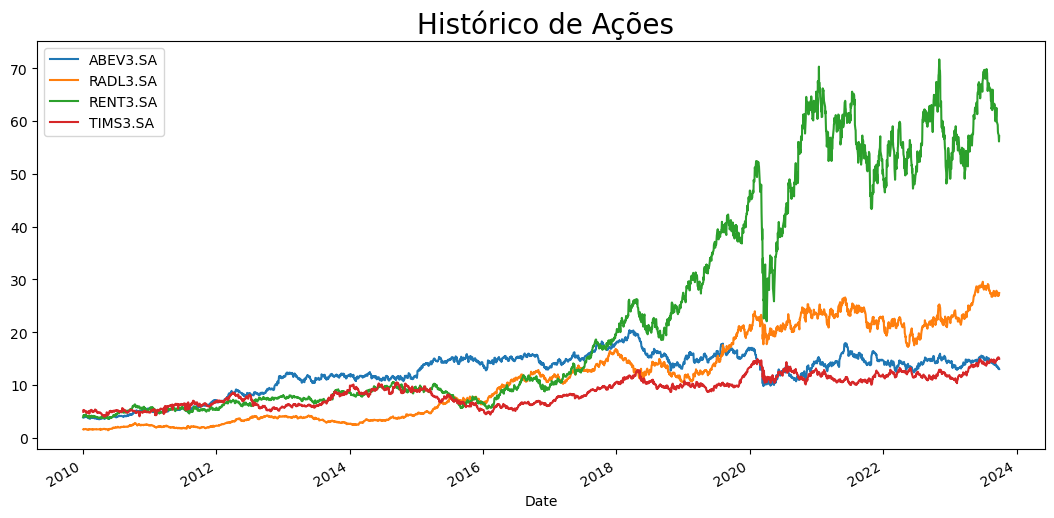

In [3]:
portfolio_br.plot(figsize = (13,6))
plt.title(' Histórico de Ações', size = 20)

# Normalizar os preços das ações

In [4]:
port_norm = (portfolio_br/portfolio_br.iloc[0])*100
port_norm

,ABEV3.SA,RADL3.SA,RENT3.SA,TIMS3.SA
Date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.588218,97.570459,101.333359,107.242302
2010-01-06,101.614395,98.556327,109.230717,105.849545
2010-01-07,102.091532,97.887375,104.615362,103.481862
2010-01-08,101.895449,99.612659,105.589753,102.367655
...,...,...,...,...
2023-09-22,342.658300,1736.115611,1472.483719,307.377664
2023-09-25,345.270035,1712.697302,1465.393479,310.027474
2023-09-26,340.568922,1703.203438,1451.972738,306.970012


# Calcular os retornos logarítmicos

In [5]:
rtn_log = np.log(portfolio_br/portfolio_br.shift(1))
rtn_log

,ABEV3.SA,RADL3.SA,RENT3.SA,TIMS3.SA
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.005865,-0.024595,0.013245,0.069921
2010-01-06,0.010150,0.010053,0.075047,-0.013072
2010-01-07,0.004685,-0.006811,-0.043172,-0.022622
2010-01-08,-0.001923,0.017472,0.009271,-0.010826
...,...,...,...,...
2023-09-22,-0.009105,0.020999,-0.006172,0.007026
2023-09-25,0.007593,-0.013581,-0.004827,0.008584
2023-09-26,-0.013709,-0.005559,-0.009201,-0.009911


# Pesos de cada ativo na carteira

In [6]:
pesos = np.array([0.25,0.25,0.25,0.25])
np.dot(rtn_log,pesos)

array([        nan,  0.0161089 ,  0.02054453, ..., -0.00959486,
       -0.00504563,  0.00747595])

# Cálculo dos retornos anuais médios dos ativos

In [7]:
an_rtns = rtn_log.mean()*250
an_rtns

ABEV3.SA    0.089478
RADL3.SA    0.209140
RENT3.SA    0.196431
TIMS3.SA    0.081568
dtype: float64

# Cálculo do retorno anual da carteira

In [8]:
rtn_an_port = np.dot(an_rtns,pesos)
rtn_an_port

0.14415407288450022

In [9]:
print(str(round(rtn_an_port,5)*100) + ' % a.a ' )

14.415 % a.a 


# Baixar dados históricos do índice Ibovespa e adicionar à carteira

In [10]:
portfolio_2 = yf.download(tickers= ('TIMS3.SA', 'RENT3.SA', 'ABEV3.SA', 'RADL3.SA', '^BVSP'), start='2010-1-1')['Adj Close']
portfolio_2

[*********************100%***********************]  5 of 5 completed


,ABEV3.SA,RADL3.SA,RENT3.SA,TIMS3.SA,^BVSP
Date,,,,,
2010-01-04,3.828887,1.579964,3.915932,4.906015,70045.0
2010-01-05,3.851411,1.541578,3.968145,5.261326,70240.0
2010-01-06,3.890701,1.557154,4.277403,5.192996,70729.0
2010-01-07,3.908969,1.546585,4.096667,5.076838,70451.0
2010-01-08,3.901461,1.573845,4.134824,5.022175,70263.0
...,...,...,...,...,...
2023-09-22,13.120000,27.430000,57.661453,15.080000,116009.0
2023-09-25,13.220000,27.059999,57.383804,15.210000,115925.0
2023-09-26,13.040000,26.910000,56.858257,15.060000,114193.0


# Normalização dos preços do portfólio com o índice Ibovespa

In [11]:
port_2_norm = (portfolio_2/portfolio_2.iloc[0])*100
port_2_norm

,ABEV3.SA,RADL3.SA,RENT3.SA,TIMS3.SA,^BVSP
Date,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.588262,97.570482,101.333353,107.242343,100.278392
2010-01-06,101.614401,98.556312,109.230777,105.849566,100.976515
2010-01-07,102.091526,97.887359,104.615385,103.481892,100.579627
2010-01-08,101.895424,99.612727,105.589777,102.367704,100.311228
...,...,...,...,...,...
2023-09-22,342.658300,1736.115742,1472.483540,307.377754,165.620672
2023-09-25,345.270035,1712.697431,1465.393301,310.027564,165.500750
2023-09-26,340.568922,1703.203567,1451.972561,306.970101,163.028053


# Plot dos gráficos

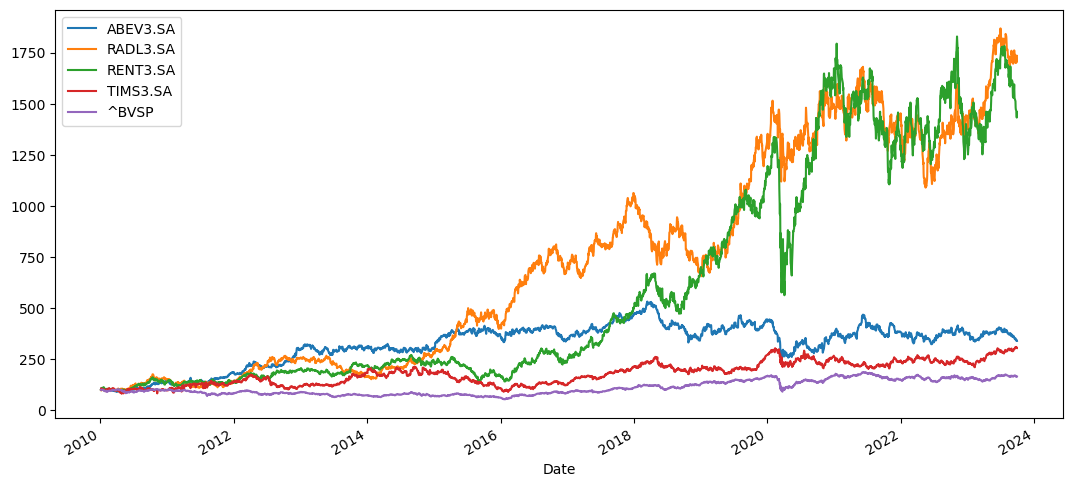

In [12]:
port_2_norm.plot(figsize=(13,6))
plt.show()

# Concentração no Ibovespa

## Baixar dados históricos do índice Ibovespa, Vale e Petrobras 

In [13]:
portfolio_3 = yf.download(tickers= ('VALE3.SA', 'PETR4.SA', '^BVSP'), start='2010-1-1')['Adj Close']
portfolio_3

[*********************100%***********************]  3 of 3 completed


,PETR4.SA,VALE3.SA,^BVSP
Date,,,
2010-01-04,11.118155,24.706104,70045.0
2010-01-05,11.022824,24.936422,70240.0
2010-01-06,11.171782,25.464230,70729.0
2010-01-07,11.067510,25.569786,70451.0
2010-01-08,11.007930,25.819296,70263.0
...,...,...,...
2023-09-22,34.029999,68.000000,116009.0
2023-09-25,34.250000,66.599998,115925.0
2023-09-26,33.459999,65.559998,114193.0


## Normalização dos preços

In [14]:
port_3_norm = (portfolio_3/portfolio_3.iloc[0])*100
port_3_norm

,PETR4.SA,VALE3.SA,^BVSP
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,99.142563,100.932231,100.278392
2010-01-06,100.482329,103.068575,100.976515
2010-01-07,99.544476,103.495823,100.579627
2010-01-08,99.008597,104.505735,100.311228
...,...,...,...
2023-09-22,306.075939,275.235623,165.620672
2023-09-25,308.054695,269.569001,165.500750
2023-09-26,300.949192,265.359511,163.028053


## Criando a matriz de correlação

In [15]:
correlation_matrix = port_3_norm.corr()
correlation_matrix

,PETR4.SA,VALE3.SA,^BVSP
PETR4.SA,1.000000,0.772115,0.744049
VALE3.SA,0.772115,1.000000,0.899692
^BVSP,0.744049,0.899692,1.000000


## Criando o mapa de calor

<Axes: >

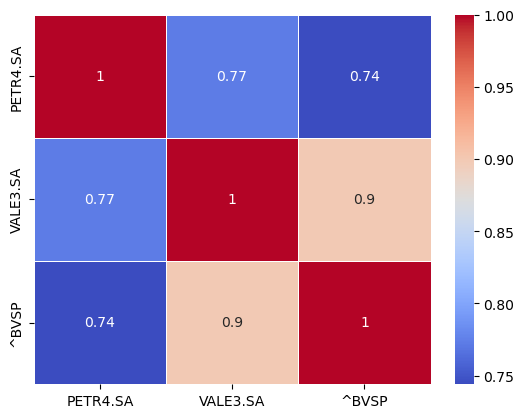

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Relatório Final

Neste relatório, analisamos uma carteira de investimentos composta por quatro ativos brasileiros: TIMS3.SA, RENT3.SA, ABEV3.SA e RADL3.SA. A análise foi conduzida com base em várias etapas, desde o download dos dados até a criação de uma matriz de correlação. O objetivo é avaliar o desempenho e a diversificação da carteira.

O retorno anual da carteira foi calculado como aproximadamente 14.415% ao ano. Este número representa o retorno médio ponderado dos quatro ativos da carteira. É importante notar que essa carteira teve um desempenho sólido durante o período avaliado.

A diversificação é um princípio fundamental em investimentos, e esta nossa carteira tenta seguir essa abordagem. Os ativos escolhidos pertencem a diferentes setores da economia, o que ajuda a reduzir o risco, pois o desempenho de um setor pode compensar o desempenho de outro.

Além da carteira original, nós adicionamos uma análise comparativa com o índice Ibovespa. Isso permite avaliar como a carteira se saiu em relação ao mercado como um todo. E percebemos pelo gráfico, que a carteira teve um desempenho positivo, superando o mercado em várias ocasiões.

Além da análise do desempenho da carteira, também exploramos a relação dos ativos VALE3.SA e PETR4.SA com o índice Ibovespa através da matriz de correlação. No contexto da nossa análise, a matriz de correlação revelou que as ações VALE3.SA e PETR4.SA têm correlações positivas com o índice Ibovespa. Isso sugere que essas ações estão mais propensas a acompanhar o desempenho geral do mercado brasileiro. Quando o Ibovespa sobe, é mais provável que essas ações também subam, e vice-versa.